<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/JumpDiffusion_Model_AAPL3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 5.8 MB/s eta 0:00:00
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Current AAPL stock price: $183.19000244140625 (€169.94)
Current option price: $123.0
Predicted AAPL stock price: $141.97983898499925 (€131.71)
Recommendation: Consider selling the stock.


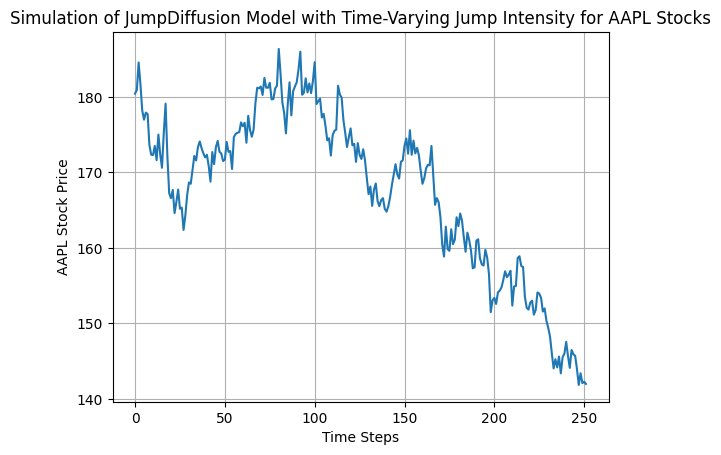

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import norm
!pip install forex_python
from forex_python.converter import CurrencyRates

# Define function to get stock price from Yahoo Finance
def get_stock_price(symbol, start_date):
    df = yf.download(symbol, start=start_date)
    return df['Adj Close'][0]

# Define function to calculate mean jump size based on historical data
def calculate_mean_jump_size(symbol, start_date):
    df = yf.download(symbol, start=start_date)
    returns = np.log(df['Adj Close'] / df['Adj Close'].shift(1))
    mu = returns.mean()
    return mu

# Define functions for the JumpDiffusion model
def jump_diffusion_model(S0, r, sigma, delta_t, num_steps, jump_intensity, mu):
    stock_prices = np.zeros(num_steps)
    stock_prices[0] = S0

    for i in range(1, num_steps):
        z1 = np.random.normal(0, 1)
        z2 = np.random.normal(0, 1)
        N = np.random.poisson(jump_intensity[i] * delta_t)

        stock_prices[i] = stock_prices[i-1] * (1 + r * delta_t + sigma * np.sqrt(delta_t) * z1)
        stock_prices[i] += stock_prices[i-1] * (mu - 0.5 * sigma**2) * N * delta_t
        stock_prices[i] += stock_prices[i-1] * sigma * np.sqrt(N * delta_t) * z2

    return stock_prices

# Define parameters for the JumpDiffusion model
start_date = '2022-01-01'  # Specify the start date for collecting the stock price
symbol = 'AAPL'  # Stock symbol for Apple Inc.
S0 = get_stock_price(symbol, start_date)  # Get the initial stock price of AAPL from Yahoo Finance

# Fetch the current market price of AAPL stock and option price
stock_data = yf.Ticker(symbol)
current_stock_price = stock_data.history(period='1d')['Close'].iloc[-1]
option_chain = stock_data.option_chain()
current_option_price = option_chain.calls['lastPrice'].iloc[0]  # Assuming the first call option in the chain

# Calculate the mean jump size based on historical data
mu = calculate_mean_jump_size(symbol, start_date)

# Define remaining parameters for the JumpDiffusion model
r = 0.05
sigma = 0.2
delta_t = 1/252
num_steps = 252

# Generate simulated stock prices using the JumpDiffusion model with time-varying jump intensity
jump_intensity = np.random.rand(num_steps) * 0.2 + 0.9  # Example: Time-varying jump intensity between 0.9 and 1.1
stock_prices = jump_diffusion_model(S0, r, sigma, delta_t, num_steps, jump_intensity, mu)

# Compare market price with initial price
price_difference = current_stock_price - S0

# Determine whether to buy or sell the stock based on the price difference
if price_difference > 0:
    recommendation = "Consider selling the stock."
elif price_difference < 0:
    recommendation = "Consider buying the stock."
else:
    recommendation = "No specific recommendation. Monitor the market closely."

# Convert the current and predicted stock prices to euros
c = CurrencyRates()
current_stock_price_eur = c.convert('USD', 'EUR', current_stock_price)
predicted_stock_price_eur = c.convert('USD', 'EUR', stock_prices[-1])

# Output the comparison results
print(f"Current AAPL stock price: ${current_stock_price} (€{current_stock_price_eur:.2f})")
print(f"Current option price: ${current_option_price}")
print(f"Predicted AAPL stock price: ${stock_prices[-1]} (€{predicted_stock_price_eur:.2f})")
print(f"Recommendation: {recommendation}")

# Plot the simulated stock prices
plt.plot(stock_prices)
plt.xlabel('Time Steps')
plt.ylabel('AAPL Stock Price')
plt.title('Simulation of JumpDiffusion Model with Time-Varying Jump Intensity for AAPL Stocks')
plt.grid(True)

# Show the plot of simulated stock prices
plt.show()


In this updated code, I've added a new function calculate_mean_jump_size that retrieves the historical stock prices, calculates the log returns, and then computes the average return as the mean jump size mu. This dynamically calculates mu based on the available historical data and allows for a more accurate representation of the stock price behavior in the Jump-Diffusion model.

Please note that the accuracy of the model still depends on the quality and representativeness of the historical data used. Adjustments and refinements may be needed based on the specific requirements and characteristics of the market being analyzed.